In [7]:
import numpy as np
import pandas as pd
from timeit import timeit
import matplotlib  
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns
import math as m

EX 1

In [ ]:
def check(n, p, lamda):
    X = np.random.normal(loc=0.0, scale=np.sqrt(5), size=(n,p))
    y = np.random.uniform(low=-1, high=1, size=(n,1))
    val_left = X.T @ np.linalg.solve(X @  X.T + lamda * np.identity(n), y)
    val_right = np.linalg.solve(X.T @ X + lamda * np.identity(p), X.T @ y)
    if np.allclose(val_left, val_right):
        print("The equation is OK!")
    else:
        print("The equation is not true.")
    return 
check(100, 2000, 1e-5)
check(2000, 100, 1e-5)

In [7]:
import time
start = time.time()
start

1603548781.2674453

In [10]:
import time
def time_clap(n,p,lamda):
    X = np.random.normal(loc=0.0, scale=np.sqrt(5), size=(n,p))
    y = np.random.uniform(low=-1, high=1, size=(n,1))
    
    start_right = time.time()
    val_right = np.linalg.solve(X.T @ X + lamda * np.identity(p), X.T @ y)
    elap_right = time.time() - start_right

    start_left = time.time()
    val_left = X.T @ np.linalg.solve(X @  X.T + lamda * np.identity(n), y)
    elap_left = time.time() - start_left

    time_diff = elap_left - elap_right
    return time_diff

n = 1000
p = [1, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240, 20480]
time_list=[time_clap(n, p[i], 1e-5) for i in range(len(p))]
time_list

[0.02593088150024414,
 0.02094435691833496,
 0.017952442169189453,
 0.01695418357849121,
 0.019953012466430664,
 0.018950223922729492,
 0.01795220375061035,
 0.011967182159423828,
 -0.016951560974121094,
 -0.20444917678833008,
 -1.0033397674560547,
 -5.228951930999756,
 -32.82641005516052]

The result shows that when n>>p, the left side will be time-consuming as the left side will compute the n*n matrix's inverse, while left side just compute the p*p matrix

EX 2

In [14]:
def distribution(n, p, law):
    if law == 'Uniform':
        rand_M = np.random.uniform(low=-2 * m.sqrt(3), high=2 * m.sqrt(3), size=(n, p))
    elif law == 'laplace':
        rand_M = np.random.laplace(loc=0.0, scale=1.0, size=(n, p))
    elif law == 'triangle':
        rand_M = np.random.triangular(left=-2 * m.sqrt(3), mode=0, right=2 * m.sqrt(3), size=(n,p))
    else:
        print("Error happens!")
    return rand_M

X = distribution(3, 3, 'Uniform')

In [68]:
def val(p, law):
    vals = np.abs(np.linalg.eigvals(
        distribution(1000, p, law) @ distribution(1000, p, law).T))
    vals = np.sqrt(vals)
    return vals

In [69]:
law = 'Uniform';
sin_val = np.vstack((val(200, law), val(500, law), val(1000, law), val(2000, law)))
sin_val

array([[4.32132099e+01, 4.32132099e+01, 4.29952712e+01, ...,
        2.64960338e-07, 2.73181840e-07, 2.73181840e-07],
       [5.40727787e+01, 5.30402431e+01, 5.30402431e+01, ...,
        3.84413346e-07, 3.84413346e-07, 2.84588407e-07],
       [6.30819061e+01, 6.30819061e+01, 6.40976588e+01, ...,
        1.98775122e+00, 1.98775122e+00, 2.09609002e+00],
       [7.60145030e+01, 7.60145030e+01, 7.52698932e+01, ...,
        1.72962427e+01, 8.73050550e+00, 8.73050550e+00]])

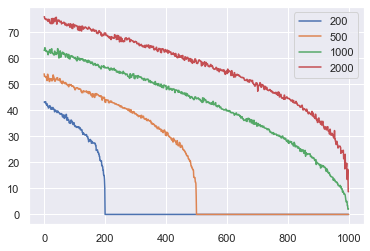

In [72]:

plt.plot(np.arange(0,1000),sin_val[0, :])
plt.plot(np.arange(0,1000),sin_val[1, :])
plt.plot(np.arange(0,1000),sin_val[2, :])
plt.plot(np.arange(0,1000),sin_val[3, :])
plt.legend(['200','500','1000','2000'])
plt.show()

In [73]:
def val_n(p, law):
    vals = np.abs(np.linalg.eigvals(
        distribution(1000, p, law) @ distribution(1000, p, law).T / 1000))
    vals = np.sqrt(vals)
    return vals

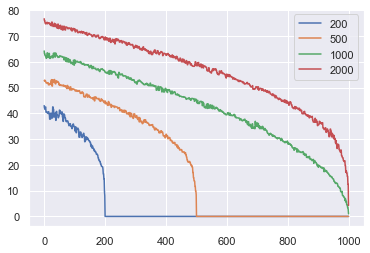

In [74]:
law = 'Uniform';
sin_val = np.vstack((val(200, law), val(500, law), val(1000, law), val(2000, law)))
plt.plot(np.arange(0,1000),sin_val[0, :])
plt.plot(np.arange(0,1000),sin_val[1, :])
plt.plot(np.arange(0,1000),sin_val[2, :])
plt.plot(np.arange(0,1000),sin_val[3, :])
plt.legend(['200','500','1000','2000'])
plt.show()

3)

In [76]:
def Power(n, p, n_iter):
    X = np.random.normal(loc=0.0, scale=np.sqrt(5), size=(n,p))
    u = np.random.rand(X.shape[0]) # create a random N*1 vector
    v = np.random.rand(X.shape[1]) # create a random P*1 vector
    for i in range(n_iter):
        u = X @ v
        v = X.T @ u
        v = v / np.linalg.norm(v, ord=2)
        u = u / np.linalg.norm(u, ord=2)
    return u,v
Power(4, 3, 100)

(array([-0.77116874,  0.45845104, -0.24368568, -0.36842734]),
 array([0.56148765, 0.59416802, 0.57593053]))

In [154]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, eigs

def dist(n, p, n_iter):
    X = np.random.normal(loc=0.0, scale=np.sqrt(5), size=(n,p))
    u = np.random.rand(X.shape[0]) # create a random N*1 vector
    v = np.random.rand(X.shape[1]) # create a random P*1 vector
    U = []
    V = []
    for i in range(n_iter):
        u = np.dot(X, v)
        v = np.dot(X.T, u)
        v = v / np.linalg.norm(v, ord=2)
        u = u / np.linalg.norm(u, ord=2)
        U.append(u)
        V.append(v)
    U = np.array(U).T
    V = np.array(V).T
    return U,V,X,n_iter

U, V, X, n_iter = dist(4,3,100)

In [155]:
X

array([[ 0.42388939, -1.11457122,  0.10404755],
       [ 5.72656994,  1.27962745,  1.66896638],
       [-3.03015339,  1.11306749, -1.48181928],
       [ 0.32949007,  1.96648238, -6.5822143 ]])

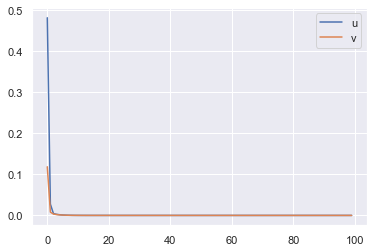

In [156]:
# find eigenvector with the largest eigenvalue
eigvec_n, eigval_n, eig_n= scipy.sparse.linalg.svds(X @ X.T, k=1, which='LM')
eigvec_n = np.tile(eigvec_n, n_iter)# repeat ten times of the vector
distance_n = np.linalg.norm(eigvec_n - U, axis=0)
eigvec_p, eigval_p, eig_p= scipy.sparse.linalg.svds(X.T @ X, k=1, which='LM')
eigvec_p = np.tile(eigvec_p, n_iter)# repeat ten times of the vector
distance_p = np.linalg.norm(eigvec_p - V, axis=0)
plt.plot(np.arange(0,100),distance_n)
plt.plot(np.arange(0,100),distance_p)
plt.legend(['u','v'])

EX 4

In [ ]:
defra_com = pd.read_csv("http://josephsalmon.eu/enseignement/TELECOM/SD204/defra_consumption.csv", sep=';', index_col=0)
defra_com

In [ ]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
defra_scaled = scaler.fit_transform(defra_com)
np.shape(defra_scaled)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault) 

fig, ax = plt.subplots(figsize=(12, 8))

plt.title('England and Wales')
plt.scatter(defra_com.iloc[:, 0], defra_com.iloc[:, 1], c='blue', s=60, alpha=0.7)
plt.xlabel(defra_com.columns[0])
plt.ylabel(defra_com.columns[1])

from mpl_toolkits import mplot3d
ax2 = plt.axes(projection='3d')
# data for the three dimension scattored points
zdata = defra_com.England
xdata = defra_com.Wales
ydata = defra_com.Scotland
ax2.scatter3D(xdata, ydata, zdata, cmap='gray')

EX 5

In [ ]:
filename = "auto-mpg.data-original"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'carname']
auto_mpg = pd.read_csv(filename, names=column_names, sep=r"\s+")
auto_mpg

In [ ]:
auto_mpg.isna().sum()
auto_mpg.dropna(axis=0, how="any", inplace=True)
auto_mpg.drop('carname', axis=1, inplace=True)
auto_mpg

In [ ]:
one_hot_encoding_columns = ['USA', 'Europe', 'Japan']
sample = auto_mpg.iloc[[23,24,25,62,63,64,128,129,230]]
sample

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

target = auto_mpg['mpg']
auto_mpg.drop('mpg', axis=1, inplace=True)

data_train, data_test, target_train, target_test = train_test_split(
    auto_mpg, target, random_state=42
)
scaler = StandardScaler()
model = make_pipeline(scaler, LinearRegression(fit_intercept=True))
model.fit(data_train, target_train)

In [ ]:
scores_scaled = cross_val_score(model, auto_mpg, target, cv=5)
print(f"The different scores obtained are: \n{scores_scaled}")

In [ ]:
print(f"The accuracy is: {scores_scaled.mean():.3f} +- {scores_scaled.std():.3f}")

In [ ]:
coef = model['linearregression'].coef_ 
intercept = model['linearregression'].intercept_

May be the weight is the most important elemnt in deciding the mpg

I prefer not to standarlised the y vector.

In [ ]:
def Compare(Y, X):
    model_XY = LinearRegression(fit_intercept=True)
    model_XY.fit(X, Y)
    coef_XY = model_XY.coef_
    ones = np.ones(np.shape(Y))
    left = np.linalg.norm(Y-Y.mean(axis=0) * ones) ** 2
    right = np.linalg.norm(Y-X @ coef_XY) ** 2 + np.linalg.norm(X @ coef_XY - Y.mean(axis=0) * ones) ** 2
    if np.isclose(left, right):
        print(f"The equation exists.")
    else:
        print(f"The equation is not true.")
    return left, right

In [ ]:
Compare(target, auto_mpg)